# SMA ROC Portfolio

    1. The Security is above its 200-day moving average
    2. The Security closes with sma_roc > 0, buy.
    3. If the Security closes with sma_roc < 0, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format
pd.set_option('display.max_rows', None)

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

Yahoo finance cryptocurrencies:  
https://finance.yahoo.com/cryptocurrencies/

10 largest Crypto currencies from 5 years ago:  
https://coinmarketcap.com/historical/20160626/   

10 largest Crypto currencies from 4 years ago:  
https://coinmarketcap.com/historical/20170625/

10 largest Crypto currencies from 3 years ago:  
https://coinmarketcap.com/historical/20180624/

10 largest Crypto currencies from 2 years ago:  
https://coinmarketcap.com/historical/20190630/

Some global data

In [3]:
# Symbol Lists

BitCoin = ['BTC-USD']
CryptoCurrencies_2016 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD',
                         'XEM-USD', 'DASH-USD', 'MAID-USD', 'LSK-USD', 'DOGE-USD']
# 'DAO-USD' is a dead coin, so missing from above


CryptoCurrencies_2017 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'ETC-USD',
                         'XEM-USD', 'MIOTA-USD', 'DASH-USD', 'BTS-USD']
# 'STRAT-USD' last trade date is 2020-11-18, so removed


CryptoCurrencies_2018 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'BCH-USD', 'EOS-USD',
                         'LTC-USD', 'XLM-USD', 'ADA-USD', 'TRX-USD', 'MIOTA-USD']

CryptoCurrencies_2019 = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD',
                         'EOS-USD', 'BNB-USD', 'USDT-USD', 'BSV-USD', 'CRO-USD']


Stocks_Bonds_Gold_Crypto = ['SPY', 'QQQ', 'TLT', 'GLD', 'BTC-USD']
# Set 'continuous_timeseries' : False (for mixed asset classes)


start_1900 = datetime.datetime(1900, 1, 1)
start_2016 = datetime.datetime(2016, 6, 26)
start_2017 = datetime.datetime(2017, 6, 25)
start_2018 = datetime.datetime(2018, 6, 24)
start_2019 = datetime.datetime(2019, 6, 30)


# Pick one of the above symbols and start pairs
symbols = CryptoCurrencies_2016
start = start_2016

capital = 10000
end = datetime.datetime.now()

In [4]:
# NOTE: Cryptocurrencies have 7 days a week timeseries.  You can test them with
# their entire timeseries by setting stock_market_calendar=False.  Alternatively,
# to trade with stock market calendar by setting stock_market_calendar=True.
# For mixed asset classes that include stocks or ETFs, you must set
# stock_market_calendar=True.

options = {
    'use_adj' : False,
    'use_cache' : False,
    'stock_market_calendar' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1,
    'lookback' : 1,
    'sma_timeperiod': 20,
    'sma_pct_band': 3,
    'use_regime_filter' : False,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2016-04-25,0,0.73,96,entry,LONG,LSK-USD
1,2016-04-25,1,0.00,5961390,entry,LONG,DOGE-USD
2,2016-04-25,2,0.00,414940,entry,LONG,XEM-USD
3,2016-04-25,3,466.09,8,entry,LONG,BTC-USD
4,2016-04-25,4,4.05,306,entry,LONG,LTC-USD


In [7]:
s.tlog.head()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
0,2016-04-25,0.73,2016-04-26,0.62,-0.11,-10.18,96,-10.18,LONG,LSK-USD
1,2016-04-25,0.00,2016-05-08,0.00,-0.00,-23.65,414940,-33.83,LONG,XEM-USD
2,2016-04-25,4.05,2016-06-21,3.91,-0.14,-41.34,306,-75.17,LONG,LTC-USD
3,2016-04-25,0.00,2016-07-03,0.00,0.00,351.72,5961390,276.55,LONG,DOGE-USD
4,2016-04-25,466.09,2016-07-05,677.33,211.24,1689.94,8,1966.49,LONG,BTC-USD


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2021-06-21,10626066.05,10626066.05,10626066.05,0,10626066.05,1.00,-
2021-06-22,10626066.05,10626066.05,10626066.05,0,10626066.05,1.00,-
2021-06-23,10626066.05,10626066.05,10626066.05,0,10626066.05,1.00,-
2021-06-24,10626066.05,10626066.05,10626066.05,0,10626066.05,1.00,-
2021-06-25,10626066.05,10626066.05,10626066.05,0,10626066.05,1.00,-


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                  2016-04-05
end                                                    2021-06-25
beginning_balance                                           10000
ending_balance                                        10626066.05
total_net_profit                                      10616066.05
gross_profit                                          17001859.82
gross_loss                                            -6385793.76
profit_factor                                                2.66
return_on_initial_capital                               106160.66
annual_return_rate                                         279.87
trading_period                           5 years 2 months 20 days
pct_time_in_market                                          85.20
margin                                                          1
avg_leverage                                                 1.00
max_leverage                                                 1.00
min_levera

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
XRP-USD,"$2,985,131.41",0.11,0.28,2.53
ETH-USD,"$1,474,013.06",0.11,0.14,1.25
LSK-USD,"$1,218,749.71",0.11,0.11,1.03
DOGE-USD,"$2,746,956.61",0.11,0.26,2.33
XEM-USD,"$143,855.72",0.11,0.01,0.12
BTC-USD,"$864,340.03",0.11,0.08,0.73
LTC-USD,"$316,244.80",0.11,0.03,0.27
DASH-USD,"-$277,103.27",0.11,-0.03,-0.23
MAID-USD,"$1,143,878.00",0.11,0.11,0.97
TOTAL,"$10,616,066.05",1.00,1.00,1.00


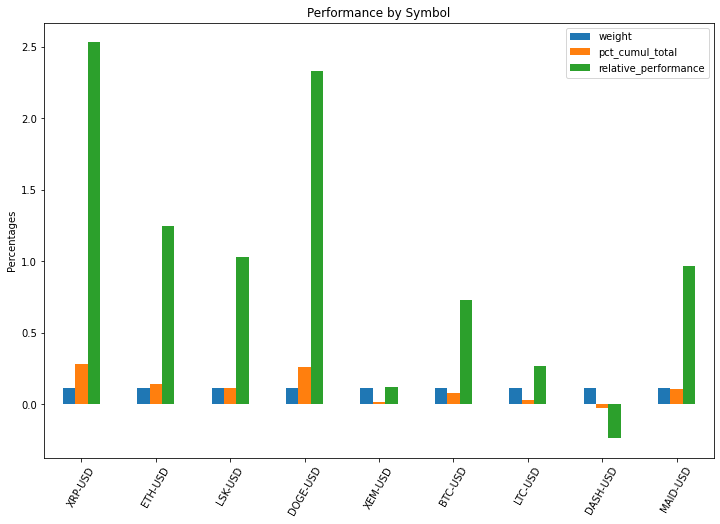

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,XRP-USD,ETH-USD,LSK-USD,DOGE-USD,XEM-USD,BTC-USD,LTC-USD,DASH-USD,MAID-USD
XRP-USD,1.00,0.44,0.25,0.37,0.40,0.41,0.48,0.39,0.35
ETH-USD,0.44,1.00,0.43,0.41,0.48,0.63,0.62,0.59,0.49
LSK-USD,0.25,0.43,1.00,0.27,0.33,0.36,0.36,0.39,0.29
DOGE-USD,0.37,0.41,0.27,1.00,0.36,0.46,0.47,0.38,0.32
XEM-USD,0.40,0.48,0.33,0.36,1.00,0.47,0.48,0.46,0.39
BTC-USD,0.41,0.63,0.36,0.46,0.47,1.00,0.68,0.58,0.52
LTC-USD,0.48,0.62,0.36,0.47,0.48,0.68,1.00,0.59,0.46
DASH-USD,0.39,0.59,0.39,0.38,0.46,0.58,0.59,1.00,0.46
MAID-USD,0.35,0.49,0.29,0.32,0.39,0.52,0.46,0.46,1.00


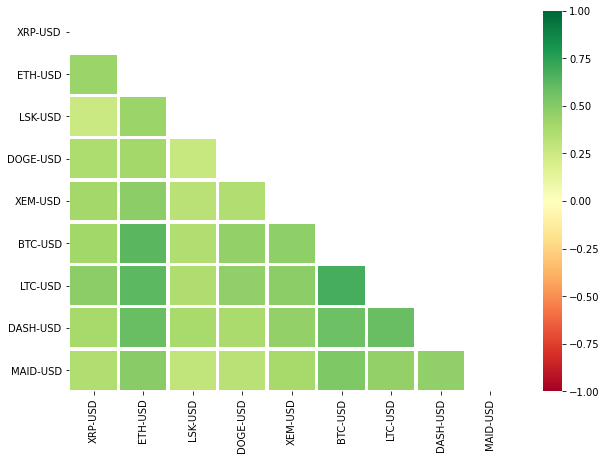

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('BTC-USD', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

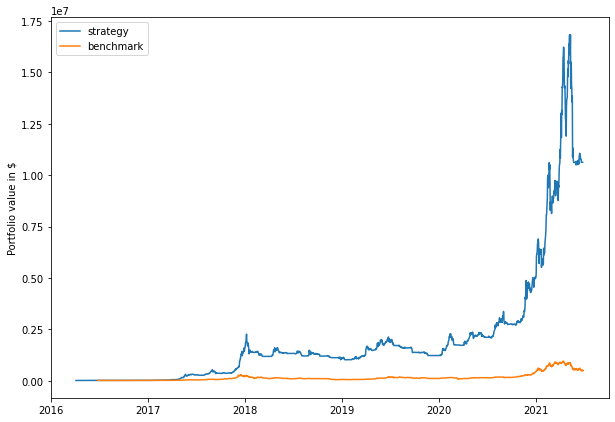

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,279.87,118.06
max_closed_out_drawdown,-55.25,-83.35
annualized_return_over_max_drawdown,5.07,1.42
best_month,239.19,132.00
worst_month,-38.13,-48.63
sharpe_ratio,1.94,1.16
sortino_ratio,2.39,1.53
monthly_std,27.87,21.82
annual_std,661.96,243.00


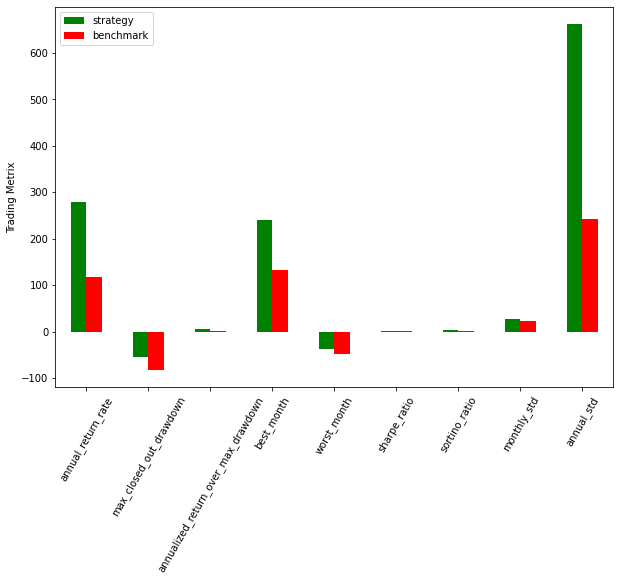

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterian(s.stats, benchmark.stats)
kelly

sharpe_ratio            1.94
sharpe_ratio_max        2.05
sharpe_ratio_min        1.82
strategy risk           6.62
instrument risk         2.43
optimal target risk     1.94
half kelly criterian    0.97
aggressive leverage     0.80
moderate leverage       0.40
conservative leverage   0.37
dtype: float64